In [55]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
y = data["Outcome"].to_numpy()

In [28]:
X = data.iloc[:, :-1].to_numpy()

In [29]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [30]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [31]:
X_train, X_tv, Y_train, Y_tv = train_test_split(X, y, test_size=0.25)

In [32]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_tv, Y_tv, test_size=0.5)

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)

In [35]:
X_test = scaler.transform(X_test)

In [36]:
X_valid = scaler.transform(X_valid)

In [37]:
len(X_train), len(X_test)

(576, 96)

In [38]:
len(Y_train), len(Y_test)

(576, 96)

### Train the model

In [39]:
N, D = X_train.shape

In [40]:
K = 1

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((D,)),
    tf.keras.layers.Dense(K, activation="sigmoid")
])

In [42]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [43]:
r = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=50)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5283 - loss: 0.8248 - val_accuracy: 0.5312 - val_loss: 0.9078
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4956 - loss: 0.8368 - val_accuracy: 0.5521 - val_loss: 0.8866
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5043 - loss: 0.8437 - val_accuracy: 0.5729 - val_loss: 0.8662
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5647 - loss: 0.7533 - val_accuracy: 0.5833 - val_loss: 0.8471
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5721 - loss: 0.7848 - val_accuracy: 0.5833 - val_loss: 0.8283
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5798 - loss: 0.7323 - val_accuracy: 0.5833 - val_loss: 0.8101
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5929 - loss: 0.7258 - val_accuracy: 0.5833 - val_loss: 0.7935
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6099 - loss: 0.6956 - val_accuracy: 0.6146 - val_loss

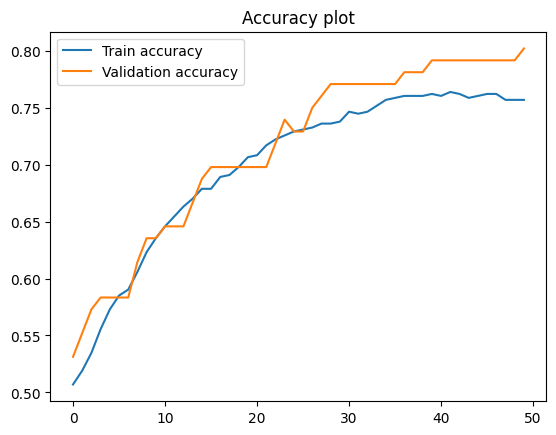

In [44]:
plt.plot(r.history["accuracy"], label="Train accuracy")
plt.plot(r.history["val_accuracy"], label="Validation accuracy")
plt.title("Accuracy plot")
plt.legend();

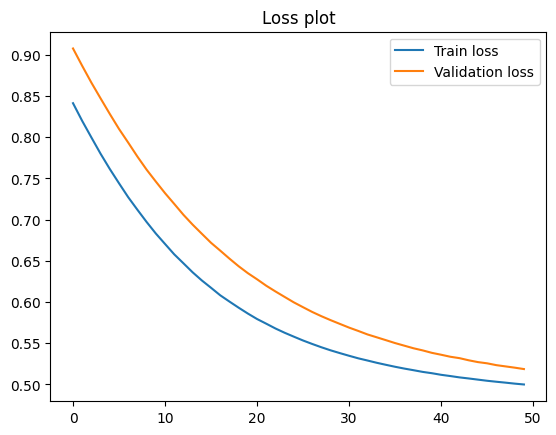

In [45]:
plt.plot(r.history["loss"], label="Train loss")
plt.plot(r.history["val_loss"], label="Validation loss")
plt.title("Loss plot")
plt.legend();

In [46]:
print(f"Train classification rate: {r.history['accuracy'][-1]*100:.02f}%")

Train classification rate: 75.69%


In [47]:
print(f"Train loss: {r.history['loss'][-1]}%")

Train loss: 0.49993133544921875%


In [48]:
evaluation = model.evaluate(X_test, Y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7917 - loss: 0.4605 


In [49]:
print(f"Test classification rate: {evaluation[1] * 100:.02f}%")

Test classification rate: 80.21%


In [50]:
print(f"Test loss: {evaluation[0]}")

Test loss: 0.45529377460479736


In [51]:
Y_pred = np.round(model.predict(X_test))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [52]:
confusion_matrix = confusion_matrix(Y_pred, Y_test) 

In [53]:
print(confusion_matrix)

[[55 14]
 [ 5 22]]
